**Imports**

In [1]:
import pandas as pd

import glob

from collections import Counter

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [12]:
import tqdm

In [4]:
import itertools

In [5]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [6]:
def seperate_equilibria_and_non(df):
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)], df[df['ID'].isin(noneq_players_ID)]

**Test case memory-one**

In [7]:
df = pd.read_csv("against_memory_one.csv", index_col=0)

<ipython-input-7-ef42ba560353>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("against_memory_one.csv", index_col=0)


In [8]:
df['p2'].describe()

count    445736.000000
mean          0.278756
std           0.186406
min           0.000000
25%           0.132070
50%           0.264010
75%           0.398130
max           1.000000
Name: p2, dtype: float64

In [9]:
eq, noneq = seperate_equilibria_and_non(df)

Akin's conditions for memory one strategies are the following:

$\frac{T - R}{R - S} p_3 \leq 1 - p_2$ and $\frac{T - R}{R - P} p_4 \leq 1 - p_2$.

For one-bit reactive strategies, $p_3 = p_1 = 1$ and $p_2 = p_4$. 

For the donation game $R = b - c, T = b, S = -c, P = 0$.


$$\frac{T - R}{R - S} p_3 \leq 1 - p_2 \Rightarrow \frac{c}{b} \leq 1 - p_2$$

and

$$\frac{T - R}{R - P} p_4 \leq 1 - p_2 \Rightarrow \frac{c}{b} \leq 1 - p_2$$

In the case of $b=2$ and $c=1$, $p_2 \geq 1 - \frac{1}{2}.$

In [10]:
eq['p2'].describe()

count    419712.000000
mean          0.249422
std           0.144416
min           0.000010
25%           0.124160
50%           0.248370
75%           0.374912
max           0.500050
Name: p2, dtype: float64

This was when co-player could be memory-one. Let's check for one-bit against one-bit.

In [11]:
columns = (["", "ID"] + [f'p{i+1}' for i in range(4)] + [f'q{i+1}' for i in range(4)] + 
       ['label', 'Sp', 'Sq', "condition A", "condition B",'c', 'b'])

files = glob.glob("../one_bit_reactive/*.csv")

dfs = [pd.read_csv(file,
                 header=None, names=columns, index_col=0) for file in files[:1000]]

df = pd.concat(dfs)

In [12]:
df.head()

,ID,p1,p2,p3,p4,q1,q2,q3,q4,label,Sp,Sq,condition A,condition B,c,b
,,,,,,,,,,,,,,,,
0,4217,1,0.55264,1,0.55264,0,0,0,0,N0,1.0,1.10528,False,False,2,1
0,7516,1,0.96165,1,0.96165,0,0,0,0,N0,1.0,1.92330,False,False,2,1
0,9109,1,0.59358,1,0.59358,0,0,0,0,N0,1.0,1.18716,False,False,2,1
0,6023,1,0.84035,1,0.84035,0,0,0,0,N0,1.0,1.68070,False,False,2,1
0,5722,1,0.65054,1,0.65054,0,0,0,0,N0,1.0,1.30108,False,False,2,1


In [13]:
eq, noneq = seperate_equilibria_and_non(df)

In [14]:
eq['p2'].describe()

count    2060.000000
mean        0.247232
std         0.140627
min         0.000550
25%         0.131860
50%         0.247650
75%         0.361800
max         0.499370
Name: p2, dtype: float64

**Two bit case**

In [42]:
files = glob.glob("../two_bit_in_memory_two 4/*csv")

In [43]:
len(files)

6314

In [44]:
import random

In [78]:
sub_set_of_files = random.sample(files, k=1000)

In [79]:
columns = (["", "ID"] + [f'p{i+1}' for i in range(16)] +
       ['label', 'Sp', 'Sq', "condition A", "condition B",'c', 'b'])

In [80]:
dfs = []

for file in tqdm.tqdm_notebook(sub_set_of_files):
    
    dfs.append(pd.read_csv(file, index_col=0,
                 header=None, names=columns))

<ipython-input-80-13d0753256cd>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm.tqdm_notebook(sub_set_of_files):


In [81]:
nash_indices = [i for i, df in enumerate(dfs) if (df['condition A'] == True).all()]

In [82]:
df = pd.concat([dfs[i] for i in nash_indices])

In [83]:
# df = pd.concat(dfs)

In [84]:
df.head()

,ID,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p14,p15,p16,label,Sp,Sq,condition A,condition B,c,b
,,,,,,,,,,,,,,,,,,,,,
0,3173,1,0.07767,1,0.07767,0.69626,0.23594,0.69626,0.23594,1,...,0.23594,0.69626,0.23594,N0,1.0,0.471880,True,True,2,1
1,3173,1,0.07767,1,0.07767,0.69626,0.23594,0.69626,0.23594,1,...,0.23594,0.69626,0.23594,N1,1.0,0.380548,True,True,2,1
2,3173,1,0.07767,1,0.07767,0.69626,0.23594,0.69626,0.23594,1,...,0.23594,0.69626,0.23594,N2,1.0,0.416964,True,True,2,1
3,3173,1,0.07767,1,0.07767,0.69626,0.23594,0.69626,0.23594,1,...,0.23594,0.69626,0.23594,N3,1.0,0.366784,True,True,2,1
4,3173,1,0.07767,1,0.07767,0.69626,0.23594,0.69626,0.23594,1,...,0.23594,0.69626,0.23594,N4,1.0,0.471880,True,True,2,1


In [131]:
len(nash_indices)

20

In [133]:
1000 - 20 - 488

492

In [95]:
ss = [df[df['condition A'] == False]['label'] for df in dfs]

In [ ]:
flat_list = [item for sublist in ss for item in sublist]

counter = Counter(flat_list)

In [121]:
ss_without_N0 = [s for _, s in enumerate(ss) if ('N0' not in list(s.values))]

In [122]:
flat_list = [item for sublist in ss_without_N0 for item in sublist]

counter = Counter(flat_list)

In [126]:
max(counter.values())

73

In [108]:
[s for _, s in enumerate(ss) if ('N0' not in list(s.values))]

[
 50          N50
 51          N51
 54          N54
 55          N55
 58          N58
           ...  
 65315    N65315
 65328    N65328
 65329    N65329
 65330    N65330
 65331    N65331
 Name: label, Length: 21623, dtype: object,
 
 8263      N8263
 8271      N8271
 8279      N8279
 8287      N8287
 8291      N8291
           ...  
 65315    N65315
 65328    N65328
 65329    N65329
 65330    N65330
 65331    N65331
 Name: label, Length: 9935, dtype: object,
 
 13060    N13060
 14208    N14208
 16256    N16256
 25484    N25484
 27532    N27532
 29444    N29444
 29452    N29452
 29580    N29580
 31628    N31628
 32448    N32448
 34700    N34700
 38789    N38789
 38796    N38796
 40776    N40776
 41868    N41868
 42892    N42892
 44932    N44932
 45828    N45828
 45964    N45964
 46920    N46920
 46988    N46988
 47944    N47944
 53124    N53124
 62212    N62212
 62732    N62732
 64072    N64072
 Name: label, dtype: object,
 
 40716    N40716
 42952    N42952
 47048    N47048
 Name: la

In [100]:
len(dfs)

1000

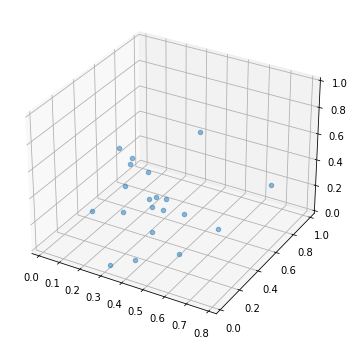

In [128]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')

axes = [ax1]


for i, row in df[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():
        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)
        
# for i, row in eq2[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():
#         ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

for ax in axes:
    ax.set_zlim(0, 1);
#     ax.view_init(10, -80)

In [130]:
df[['p2', 'p5', 'p6']].drop_duplicates()

,p2,p5,p6
,,,
0,0.07767,0.69626,0.23594
0,0.77522,0.65678,0.42818
0,0.55815,0.18667,0.12087
0,0.02511,0.83450,0.18744
0,0.40169,0.08579,0.06269
0,0.38471,0.44909,0.27028
0,0.53856,0.29087,0.33502
0,0.30259,0.98269,0.41519
0,0.30547,0.02799,0.01631


In [41]:
dfs[2]

,ID,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,q14,q15,q16,label,Sp,Sq,condition A,condition B,c,b
,,,,,,,,,,,,,,,,,,,,,
0,8282,1,0.67418,1,0.67418,0.20234,0.28879,0.20234,0.28879,1,...,0,0,0,N0,1.0,0.577580,True,True,2,1
1,8282,1,0.67418,1,0.67418,0.20234,0.28879,0.20234,0.28879,1,...,0,0,1,N1,1.0,0.503266,True,True,2,1
2,8282,1,0.67418,1,0.67418,0.20234,0.28879,0.20234,0.28879,1,...,0,1,0,N2,1.0,0.493672,True,True,2,1
3,8282,1,0.67418,1,0.67418,0.20234,0.28879,0.20234,0.28879,1,...,0,1,1,N3,1.0,0.459105,True,True,2,1
4,8282,1,0.67418,1,0.67418,0.20234,0.28879,0.20234,0.28879,1,...,1,0,0,N4,1.0,0.577580,True,True,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32188,8282,1,0.67418,1,0.67418,0.20234,0.28879,0.20234,0.28879,1,...,1,0,0,N32188,1.0,0.680781,True,True,2,1
32189,8282,1,0.67418,1,0.67418,0.20234,0.28879,0.20234,0.28879,1,...,1,0,1,N32189,1.0,0.680781,True,True,2,1
32190,8282,1,0.67418,1,0.67418,0.20234,0.28879,0.20234,0.28879,1,...,1,1,0,N32190,1.0,0.680781,True,True,2,1


In [21]:
# df2 = pd.read_csv("../two_bit_reactive_nash.csv", index_col=0)

In [22]:
# df2['ID'].nunique()

100000

In [23]:
# df2 = df2[df2['ID'].isin(df['ID'])]

In [24]:
# df2.head()

,ID,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,q14,q15,q16,label,Sp,Sq,condition A,condition B,c,b
0,6368,1,0.66446,1,0.66446,0.91436,0.1633,0.91436,0.1633,1,...,0,0,0,N0,1.0,0.326600,True,True,2,1
1,6368,1,0.66446,1,0.66446,0.91436,0.1633,0.91436,0.1633,1,...,1,0,1,N1,1.0,0.672133,True,True,2,1
2,6368,1,0.66446,1,0.66446,0.91436,0.1633,0.91436,0.1633,1,...,0,1,0,N2,1.0,0.607941,True,True,2,1
3,6368,1,0.66446,1,0.66446,0.91436,0.1633,0.91436,0.1633,1,...,1,1,1,N3,1.0,0.755111,True,True,2,1
4,6368,1,0.66446,1,0.66446,0.91436,0.1633,0.91436,0.1633,1,...,0,0,0,N4,1.0,0.708209,True,True,2,1


In [25]:
df['ID'].nunique(), df2['ID'].nunique()

(4942, 4942)

In [26]:
playes_exp_one = df[['ID', 'p1', 'p2', 'p5', 'p6']].drop_duplicates().reset_index(drop=True) 
playes_exp_two = df2[['ID', 'p1', 'p2', 'p5', 'p6']].drop_duplicates().reset_index(drop=True)

In [27]:
eq, noneq = seperate_equilibria_and_non(df)

eq2, noneq2 = seperate_equilibria_and_non(df2)

In [28]:
# eq.to_csv("../two_bit_nash_against_mem_one.csv")

In [29]:
# noneq.to_csv("../two_bit_non_nash_against_mem_one.csv")

In [42]:
noneq['ID'].nunique()

4834

In [30]:
groups = noneq[noneq['condition A'] == False].groupby('ID')

In [31]:
sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [32]:
flat_list = [item for sublist in sets for item in sublist]

counter = Counter(flat_list)

In [33]:
N0_explains = noneq[(noneq['label'] == 'N0') & (noneq['condition A'] == False)]['ID'].unique()

In [34]:
len(set(N0_explains))

2468

In [37]:
counter

Counter({'N0': 2484,
         'N37448': 3,
         'N12868': 27,
         'N53184': 2,
         'N41856': 13,
         'N34700': 19,
         'N11208': 31,
         'N46668': 7,
         'N47944': 4,
         'N40776': 26,
         'N31424': 7,
         'N9100': 64,
         'N12232': 18,
         'N29568': 6,
         'N12224': 7,
         'N47876': 9,
         'N63752': 6,
         'N8771': 13,
         'N60292': 5,
         'N25280': 11,
         'N12992': 8,
         'N41664': 3,
         'N33': 32,
         'N12172': 18,
         'N10124': 34,
         'N47680': 13,
         'N33676': 26,
         'N40716': 29,
         'N14084': 6,
         'N16128': 4,
         'N8261': 16,
         'N45644': 8,
         'N11148': 41,
         'N14024': 13,
         'N41740': 2,
         'N33664': 18,
         'N40836': 22,
         'N45640': 8,
         'N43584': 7,
         'N8833': 16,
         'N29440': 19,
         'N37568': 8,
         'N31812': 2,
         'N28556': 14,
         'N1': 19

In [36]:
counter['N43690']

0

In [22]:
list(itertools.product([0, 1], repeat=16))[43690]

(1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0)

In [ ]:
deterministic_strategies

In [63]:
without_N0 = noneq[~noneq['ID'].isin(N0_explains)]

In [65]:
groups = without_N0[without_N0['condition A'] == False].groupby('ID')

In [66]:
sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [67]:
flat_list = [item for sublist in sets for item in sublist]

counter = Counter(flat_list)

In [76]:
without_N0[without_N0['condition A'] == False]['ID'].unique()

array([6667, 9320, 7895, ..., 7207, 5129, 2079])

In [31]:
labels = [f"N{i}" for i in range(0, 2 ** 16)]

In [ ]:
idx_sets = []

for i, j in list(itertools.combinations(without_N0[without_N0['condition A'] == False]['ID'].unique(),
                                        r=2)):
    index = [s for _, s in enumerate(sets) if (i not in list(s) and j not in list(s))]
    
    if len(index) == 0:
        idx_sets.append((i, j))

In [ ]:
idx_sets

In [61]:
temp[(temp['label'] == 'N0') | (temp['condition A'] == True)]['ID']


0     637
0    3628
0    6014
0    5715
0    7240
     ... 
0    2608
0    1109
0    3837
0    7034
0    4735
Name: ID, Length: 5037, dtype: int64

In [27]:
eq['ID'].nunique(), df['ID'].nunique()

(211, 9900)

In [28]:
eq2['ID'].nunique(), df2['ID'].nunique()

(4797, 9900)

In [29]:
def conditition_one(p2, p4, b, c):
    return p4 < 1 - (c / b)

def conditition_two(p2, p4, b, c):
    return p2 < p4

def conditition_three(p3, b, c):
    return p3 < 1

def condition_four(p2, p4, b, c):
    return  1 + p2 < (b / c) + (p4 * (c - b)) / c

In [30]:
p2, p3, p4 =  eq[['p2', 'p5', 'p6']].drop_duplicates().iloc[0]

b = 2 

c = 1

In [31]:
conditition_one(p2, p4, b, c)

True

In [32]:
conditition_two(p2, p4, b, c)

False

In [33]:
conditition_three(p3, b, c)

True

In [34]:
condition_four(p2, p4, b, c)

True

In [35]:
x, y, z = zip(*[(i, 0, i) for i in np.linspace(0, 1, 100)])

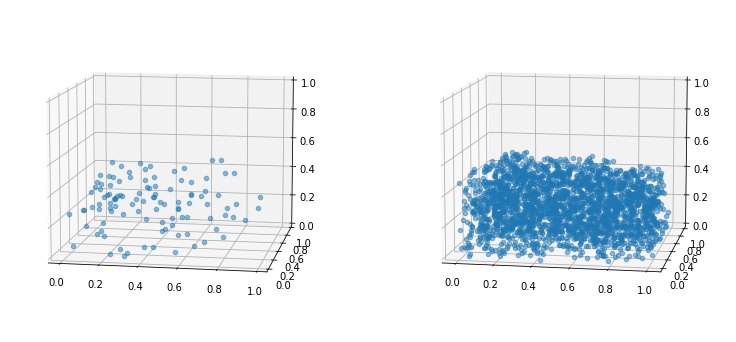

In [40]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')

ax2 = fig.add_subplot(132, projection='3d')

axes = [ax1, ax2]

    
# v = np.array([[0, 0, 0], [0, .9, 0], [1, 0, 0],  [1, .9, 0], [.5, 0, .5], [.5, .9, .5]])

# verts = [[v[0], v[1], v[3], v[2]],
#          [v[4], v[5], v[3], v[2]],
#          [v[4], v[5], v[1], v[0]],
#          [v[0], v[2], v[4], v[0]]]
            
# ax.add_collection3d(Poly3DCollection(verts, facecolors='tab:blue',
#                                      linewidths=1,
#                                      linestyle='--',
#                                      edgecolors='tab:blue', alpha=.25))


for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():
        ax1.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)
        
for i, row in eq2[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():
        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

for ax in axes:
    ax.set_zlim(0, 1);
    ax.view_init(10, -80)

In [ ]:
def all_(p2, p3, p4, b, c):
    return (conditition_one(p2, p4, b, c), 
            conditition_two(p2, p4, b, c),
            conditition_three(p3, b, c),
            condition_four(p2, p4, b, c)) 

In [ ]:
p2, p3, p4 = eq[['p2', 'p5', 'p6']].drop_duplicates().iloc[3]

In [ ]:
p2, p3, p4

In [ ]:
all_(p2, p3, p4, b, c)